In [1]:
# import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# preprocessing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# reshaping the images to add a single channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# building the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])   

C:\Users\stanl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# compiling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# model training
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9022 - loss: 0.3110 - val_accuracy: 0.9803 - val_loss: 0.0624
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9846 - loss: 0.0494 - val_accuracy: 0.9880 - val_loss: 0.0352
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9902 - loss: 0.0309 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9933 - loss: 0.0213 - val_accuracy: 0.9910 - val_loss: 0.0280
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9883 - val_loss: 0.0388


In [8]:
# model evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9841 - loss: 0.0536
Test accuracy: 0.988300


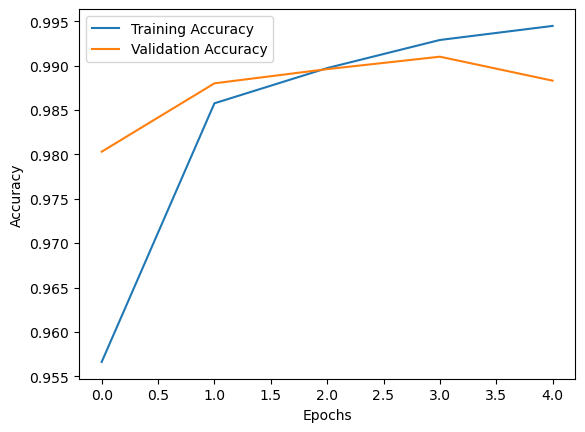

In [9]:
# plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# make predictions
predictions = model.predict(x_test)
print("Predicted label for first test image:", predictions[0].argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted label for first test image: 7


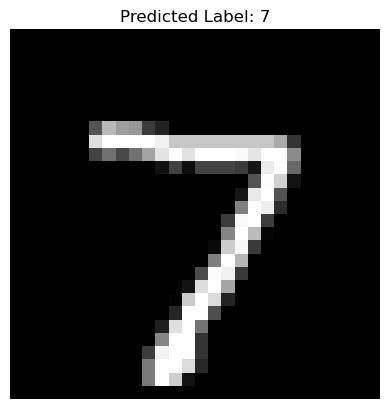

In [11]:
# now let us see what the first test image is

plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.axis("off")
plt.show()
